<a href="https://colab.research.google.com/github/EitMD/EspIDMD/blob/main/churn_ju.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Datalet Churn para el grupo de Actuarios de ACME Inc.**

## **Problema:**

Trabajaremos en conjunto al departamento de marketing de la compañia de ecommerce de **_ACME_** en el departamento de ventas. **_ACME_** tiene un software de pronóstico de ventas montado en **FORTRAN 77**, el cual tiene un timeframe de 30 días como máximo para el pronóstico. 

Aunado a ello, tiene carencias en sus procesos de actualización de data, pues en uno de ellos tarda 30 días en poder recibir los cambios en alguna variable, mientras que su tiempo de ejecución es de 7 días.

La certeza que se tiene en dicho software es del 85%.

Se realizará un nuevo software de pronóstico con su histórico para poder no solo incrementar su certeza a más de un 88%, sino incrementar el timeframe que se maneja, así como reducir el tiempo de ejecución de procesos.

### **Pasos a seguir:**

Importamos las librerías a utilizar.  
En este caso:
1. Pandas
2. Numpy
3. matplotlib
4. seaborn

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

###Lectura del Dataset

Importamos nuestro archivo CSV (dataset) como Dataframe y le hacemos una copia para poder trabajar con ella sin afectar el archivo original.

In [2]:
df = pd.read_csv('churn.csv')
df_churn=df.copy()

Obtenemos la dimensión del dataset

In [3]:
print('The shape of the dataset is:', df_churn.shape)

The shape of the dataset is: (5000, 21)


In [4]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           5000 non-null   object 
 1   Account Length  5000 non-null   int64  
 2   Area Code       5000 non-null   int64  
 3   Phone           5000 non-null   object 
 4   Int'l Plan      5000 non-null   object 
 5   VMail Plan      5000 non-null   object 
 6   VMail Message   5000 non-null   int64  
 7   Day Mins        5000 non-null   float64
 8   Day Calls       5000 non-null   int64  
 9   Day Charge      5000 non-null   float64
 10  Eve Mins        5000 non-null   float64
 11  Eve Calls       5000 non-null   int64  
 12  Eve Charge      5000 non-null   float64
 13  Night Mins      5000 non-null   float64
 14  Night Calls     5000 non-null   int64  
 15  Night Charge    5000 non-null   float64
 16  Intl Mins       5000 non-null   float64
 17  Intl Calls      5000 non-null   i

In [5]:
#df_churn.head()
df_churn.describe()

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,101.675800,773.791400,226.680000,5.518757,3.50460,5.018902,5.026199,3.140400,5.017557,4.000917,224.790000,5.023490,5.025876,5.475400,4.328242,5.525800
std,57.596762,63.470888,273.998527,3.433485,1.68812,2.195759,2.135487,2.525621,2.127857,1.631001,97.302875,1.748900,1.019302,1.877045,2.440311,2.041217
min,1.000000,657.000000,0.000000,0.000215,0.00000,0.004777,0.004659,0.000000,0.013573,0.008468,0.000000,0.054863,1.648514,0.000000,0.000769,0.000000
25%,52.000000,736.000000,0.000000,2.682384,2.00000,3.470151,3.588466,1.000000,3.529613,2.921998,150.000000,3.873157,4.349726,4.000000,2.468225,4.000000
50%,102.000000,778.000000,0.000000,5.336245,3.00000,4.988291,5.145656,3.000000,5.006860,3.962089,200.000000,5.169154,5.034905,5.000000,4.214058,6.000000
75%,151.000000,806.000000,400.000000,7.936151,5.00000,6.559750,6.552962,5.000000,6.491725,5.100128,300.000000,6.272015,5.716386,7.000000,5.960654,7.000000
max,200.000000,878.000000,1300.000000,16.897529,10.00000,12.731936,13.622097,14.000000,12.352871,10.183378,550.000000,10.407778,8.405644,12.000000,14.212261,13.000000


Limpieza de datos

In [6]:
df_churn.isna().sum()

State             0
Account Length    0
Area Code         0
Phone             0
Int'l Plan        0
VMail Plan        0
VMail Message     0
Day Mins          0
Day Calls         0
Day Charge        0
Eve Mins          0
Eve Calls         0
Eve Charge        0
Night Mins        0
Night Calls       0
Night Charge      0
Intl Mins         0
Intl Calls        0
Intl Charge       0
CustServ Calls    0
Churn?            0
dtype: int64

In [7]:
df_churn.drop(columns=["State","Phone","Int'l Plan","VMail Plan","Area Code"], inplace=True)

Selección de variables

In [8]:
df_churn['Churn?'].value_counts()

False.    2502
True.     2498
Name: Churn?, dtype: int64

In [9]:
df_churn['Churn?'].value_counts(normalize=True)

False.    0.5004
True.     0.4996
Name: Churn?, dtype: float64

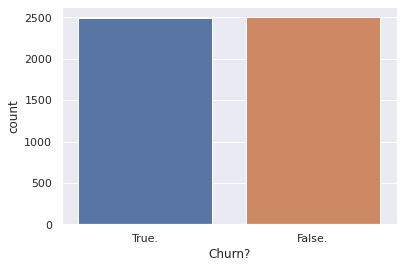

In [10]:
sns.countplot(data=df_churn,x='Churn?')

#Separación de datos y Normalización

In [11]:
#size = int(len(df_churn)*0.8)
#size2 = int(size*0.7)
#size3 = int(size*0.3)
#size4 = int(len(df_churn)*0.2)

In [12]:
df_churn = df_churn.groupby(df_churn['Churn?'])
df1= df_churn.get_group("True.")
df2= df_churn.get_group("False.")
#df_churn.describe()

In [13]:
train=df1.sample(frac=0.56)
train=train.append(df2.sample(frac=0.56))
#train

In [14]:
vald=df1.sample(frac=0.24)
vald=vald.append(df2.sample(frac=0.24))
#vald

In [15]:
test=df1.sample(frac=0.20)
test=test.append(df2.sample(frac=0.20))
#test

In [22]:
X_train = train.drop('Churn?', axis=1)
y_train = train['Churn?']
X_vald = vald.drop('Churn?', axis=1)
y_vald = vald['Churn?']
X_test = test.drop('Churn?', axis=1)
y_test = test['Churn?']


def mean_norm(df_input):
    return df_input.apply(lambda x: (x-x.mean())/ x.std(), axis=0)

X_train = mean_norm(X_train)
X_vald = mean_norm(X_vald)
X_test = mean_norm(X_test)
#print(X_train)
#print(X_vald)
#print(X_test)

#Implementación de Modelo  

##*Regresion Logística*

In [19]:
from sklearn.linear_model import LogisticRegression

In [18]:
#help(LogisticRegression)

In [20]:
log_model = LogisticRegression()

In [21]:
log_model.fit(X_train,y_train)

LogisticRegression()

Entrenar modelo


In [21]:
log_model.coef_

array([[ 1.51410173e-03, -4.53021924e-04,  1.35453982e-01,
        -5.45941744e-02,  2.47807513e-01,  7.90626926e-01,
        -1.22519425e-01, -1.50443788e-01, -2.40586448e-01,
        -2.31080582e-02,  3.86413632e-01, -5.49419099e-02,
        -4.01590977e-02, -1.24644213e-01,  6.22159366e-02]])

validar modelo

In [22]:
from sklearn.metrics import f1_score

In [ ]:
fig = plt.figure(figsize=(14,14))
x_datos, y_datos = (datos['Churn?'].values, datos['Churn?'].values)

Gráficar (validación)

Selección de dataframe para predicción

Ejecutar predicciones